In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold


In [2]:
# !pip install 
# !pip install mxnet-mkl==1.6.0 numpy==1.23.1
# ! pip install imblearn


**Q1 A - Import ‘signal-data.csv’ as DataFrame.**

In [3]:
data = pd.read_csv("/workspaces/GreatLearning/Featurization, Model Selection & Tuning/Project/signal-data.csv")

In [4]:
data.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

**Q1 B - Print 5 point summary and share at least 2 observations.**

In [5]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [6]:
data.shape

(1567, 592)

In [7]:
data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

**Observations**

*Column 0:*

Minimum value = 2746
First Quartile (Q1) = 2966 
Median (Second Quartile or Q2) = 3011 
Third Quartile (Q3)= 3056
Maxmimum value = 3356

*Column 1:*

Minimum value = 2158
First Quartile (Q1) = 2452 
Median (Second Quartile or Q2) = 2499 
Third Quartile (Q3)= 2538
Maxmimum value = 2846

*Column 588:*

Minimum value = 0.001
First Quartile (Q1) = 0.003 
Median (Second Quartile or Q2) = 0.004 
Third Quartile (Q3)= 0.006
Maxmimum value = 0.02

*Column 589:*

Minimum value = 0
First Quartile (Q1) = 44 
Median (Second Quartile or Q2) = 71 
Third Quartile (Q3)= 114
Maxmimum value = 737




**Q2 A - Write a for loop which will remove all the
features with 20%+ Null values and impute rest
with mean of the feature.**

In [8]:
for column in data.columns:

    null_percentage = data[column].isnull().sum()/len(data[column])

    if null_percentage >= 0.2:
        data.drop(column, axis=1, inplace=True)
        # print(null_percentage,column)
    else:
        if data[column].dtypes == "O":
            mode_value = data[column].mode()
            # print("Number of NaN values before filling:", data[column].isna().sum())
            data[column].fillna(mode_value, inplace=True)
            # print("Number of NaN values after filling:", data[column].isna().sum())
            # print()

        else:
            mean_value = data[column].mean()
            # print("Number of NaN values after filling:", data[column].isna().sum())
            data[column].fillna(mean_value, inplace=True)
            # print("Number of NaN values after filling:", data[column].isna().sum())
            # print()



In [9]:
data.shape

(1567, 560)

**Q2 B - Identify and drop the features which are
having same value for all the rows.**

In [10]:
features_with_same_valuie = data.columns[data.nunique() == 1]
data.drop(columns=features_with_same_valuie, inplace=True)



In [11]:
print('After dropping features having same value for all the rows (rows,columns) =',data.shape)
# data.shape

After dropping features having same value for all the rows (rows,columns) = (1567, 444)


**Q2 C - Drop other features if required using
relevant functional knowledge. Clearly justify the
same.**

In [12]:
data.drop(columns=['Time'], inplace=True)


*Dropping time columns since it won't help to predict the target column*

**Q2 D - Check for multi-collinearity in the data and
take necessary action.**

In [13]:
data.shape

(1567, 443)

In [14]:
data.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...      577     582     583     584      585       586  \
0  0.0162 -0.0034  ...  14.9509  0.5005  0.0118  0.0035   2.3630  0.021458   
1 -0.0005 -0.0148  ...  10.9003  0.5019  0.0223  0.0055   4.4447  0.009600   
2  0.0041  0.0013  ...   9.2721  0.4958  0.0157  0.0039   3.1745  0.058400   
3 -0.0124 -0.0033  ...   8.5831  0.4990  0.0103  0.0025   2.0544  0.020200   
4 -0.0031 -0.0072  ...  10.9698  0.4800  0.4766  0.1045  99.3032  0.020200   

        587       588         589  Pass/Fail  
0  0.016475  0.005283   99.670066         -1  
1  0.020100  0.006000  208.204500         -1  
2  0.048400  0.014800   82.860200          1  
3  0.014900  0.004400   73.843200         -1  
4  0.014900  0.004400   73.843200         -1  

[5 rows x 443 columns]

In [15]:

data_matrix = data.corr().abs()
print(data_matrix)

                  0         1         2         3         4         6  \
0          1.000000  0.143840  0.004756  0.007613  0.011014  0.002270   
1          0.143840  1.000000  0.005767  0.007568  0.001636  0.025564   
2          0.004756  0.005767  1.000000  0.298935  0.095891  0.136225   
3          0.007613  0.007568  0.298935  1.000000  0.058483  0.685835   
4          0.011014  0.001636  0.095891  0.058483  1.000000  0.074368   
...             ...       ...       ...       ...       ...       ...   
586        0.018443  0.009403  0.025495  0.034711  0.043929  0.041209   
587        0.025880  0.017266  0.029345  0.039132  0.031005  0.034027   
588        0.028166  0.010118  0.030818  0.033645  0.026100  0.032227   
589        0.004174  0.044797  0.032890  0.080341  0.050910  0.043777   
Pass/Fail  0.025141  0.002603  0.000957  0.024623  0.013756  0.016239   

                  7         8         9        10  ...       577       582  \
0          0.031483  0.052622  0.009045  0.00

In [16]:
upper = data_matrix.where(np.triu(np.ones(data_matrix.shape), k=1).astype(bool))
print(upper)

            0        1         2         3         4         6         7  \
0         NaN  0.14384  0.004756  0.007613  0.011014  0.002270  0.031483   
1         NaN      NaN  0.005767  0.007568  0.001636  0.025564  0.012037   
2         NaN      NaN       NaN  0.298935  0.095891  0.136225  0.146213   
3         NaN      NaN       NaN       NaN  0.058483  0.685835  0.073856   
4         NaN      NaN       NaN       NaN       NaN  0.074368  0.347734   
...        ..      ...       ...       ...       ...       ...       ...   
586       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail NaN      NaN       NaN       NaN       NaN       NaN       NaN   

                  8         9        10  ...       577       582       583  \
0        

In [17]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
print(len(to_drop),to_drop)

241 ['17', '22', '26', '27', '30', '34', '35', '36', '39', '46', '50', '51', '54', '60', '65', '66', '70', '96', '98', '101', '104', '105', '106', '123', '124', '125', '127', '130', '140', '147', '148', '152', '154', '155', '163', '164', '165', '174', '185', '187', '196', '197', '198', '199', '202', '203', '204', '205', '206', '207', '209', '224', '248', '249', '252', '254', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '367', '368', '376', '377', '386', '387', '388', '389', '390', '391',

In [18]:
data.drop(to_drop, axis=1, inplace=True)

In [19]:
data.shape

(1567, 202)

*We checked for the multi-collinearity in dataset and removed columns with high correlation*

Now, no. features reduced from 443 to 202


**Q2 E - Make all relevant modifications on the data
using both functional/logical
reasoning/assumptions.**

In [20]:
data['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64

In [21]:
data['Pass/Fail']=data['Pass/Fail'].replace([-1,1],[0,1])

In [22]:
data['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
0    0.933631
1    0.066369
Name: proportion, dtype: float64

*We have modified target column , we have label encoded the target column and repaced -1 with 0 and 1 with 1*

**Q3 A - Perform a detailed univariate Analysis with
appropriate detailed comments after each
analysis.**

*Performing univariate analysis for 200+ column is diffcult but lets start with descriptive analysis*

In [23]:
#Descriptive Statisctics
descriptive_stats = data.describe().T
print(descriptive_stats.head())


    count         mean         std        min         25%        50%  \
0  1567.0  3014.452896   73.480613  2743.2400  2966.66500  3011.8400   
1  1567.0  2495.850231   80.227793  2158.7500  2452.88500  2498.9100   
2  1567.0  2200.547318   29.380932  2060.6600  2181.09995  2200.9556   
3  1567.0  1396.376627  439.712852     0.0000  1083.88580  1287.3538   
4  1567.0     4.197013   56.103066     0.6815     1.01770     1.3171   

         75%        max  
0  3056.5400  3356.3500  
1  2538.7450  2846.4400  
2  2218.0555  2315.2667  
3  1590.1699  3715.0417  
4     1.5296  1114.5366  


In [24]:
def check_distribution(column):
    _, p_value = shapiro(column)

    if set(list(column))== set([0,1]):
        return 'Binomial'
    
    if p_value > 0.05:
        return 'Normal'

    skewness = column.skew()
    if skewness > 0:
        return 'Right Skewed'
    elif skewness < 0:
        return 'Left Skewed'

    unique_ratio = column.nunique() / len(column)
    if unique_ratio < 0.05:
        return 'Uniform'



    return 'Unknown'

In [25]:
data_dist = []

for i in data.columns:
    # print(i)
    data_dist.append([i,check_distribution(data[i])])

# print(set(data_dist))
data_dist = pd.DataFrame(data_dist,columns=["Feature","Distribution"])

In [26]:
data_dist["Distribution"].unique()

array(['Right Skewed', 'Left Skewed', 'Normal', 'Binomial'], dtype=object)

In [27]:
data.shape

(1567, 202)

In [28]:
data.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '565', '570', '571', '572', '582', '583', '586', '587', '589',
       'Pass/Fail'],
      dtype='object', length=202)

In [29]:
len(data.columns)

202

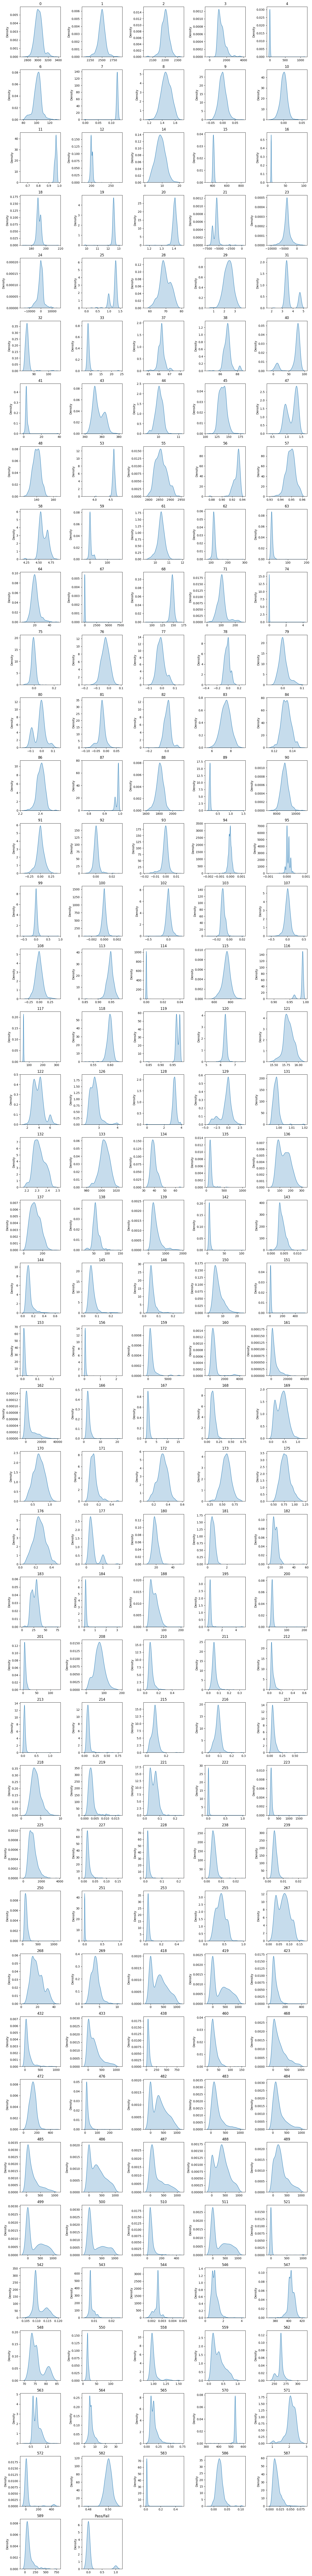

In [30]:
columns_per_row = 5
total_rows = (len(data.columns) + columns_per_row - 1) // columns_per_row
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, total_rows*3))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.kdeplot(data[column], ax=axes[i], fill=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

for j in range(len(data.columns), total_rows * columns_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [31]:
data.shape

(1567, 202)

**Insights from KDE plot**

Most of the features in the analysis is skewed (left or right skewed) some are
Normal and binomial distributed.

*Features are gorups into three different distribution by using p value (found using shapiro-wilk test)*

1.Normal Distribution (p value > 0.05)

2.Binomial Distribution (value 0/1)

3.Left Skewed Distribution (skew < 0)

4.Right Skewed Distribution (skew > 0)

In [32]:
data_dist["Distribution"].value_counts()

Distribution
Right Skewed    151
Left Skewed      49
Normal            1
Binomial          1
Name: count, dtype: int64

**Overall Distribution Insight**

No of Right skewed fearures = 368

No of left skewed feartured = 74

No of normal distributed features = 1



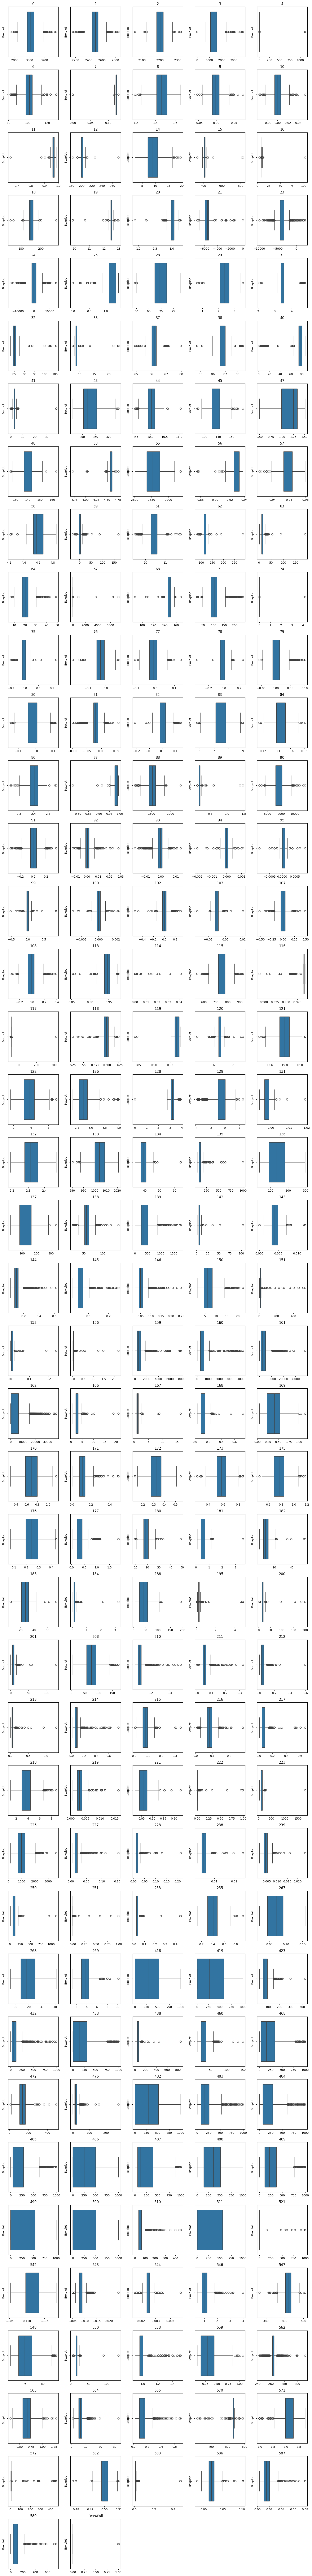

In [33]:
columns_per_row = 5
total_rows = (len(data.columns) + columns_per_row - 1) // columns_per_row
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, total_rows*3))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i], fill=True,orient="h")
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Boxplot')

for j in range(len(data.columns), total_rows * columns_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insights from Boxplot**
From the plot, we can infer most of the columns are with outliers, so we can clean and remove outiers from all the columns

In [34]:
for i in data.columns[:-1]:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    data.loc[(data[i] < low) | (data[i] > high), i] = data[i].median()


In [35]:
data.shape

(1567, 202)

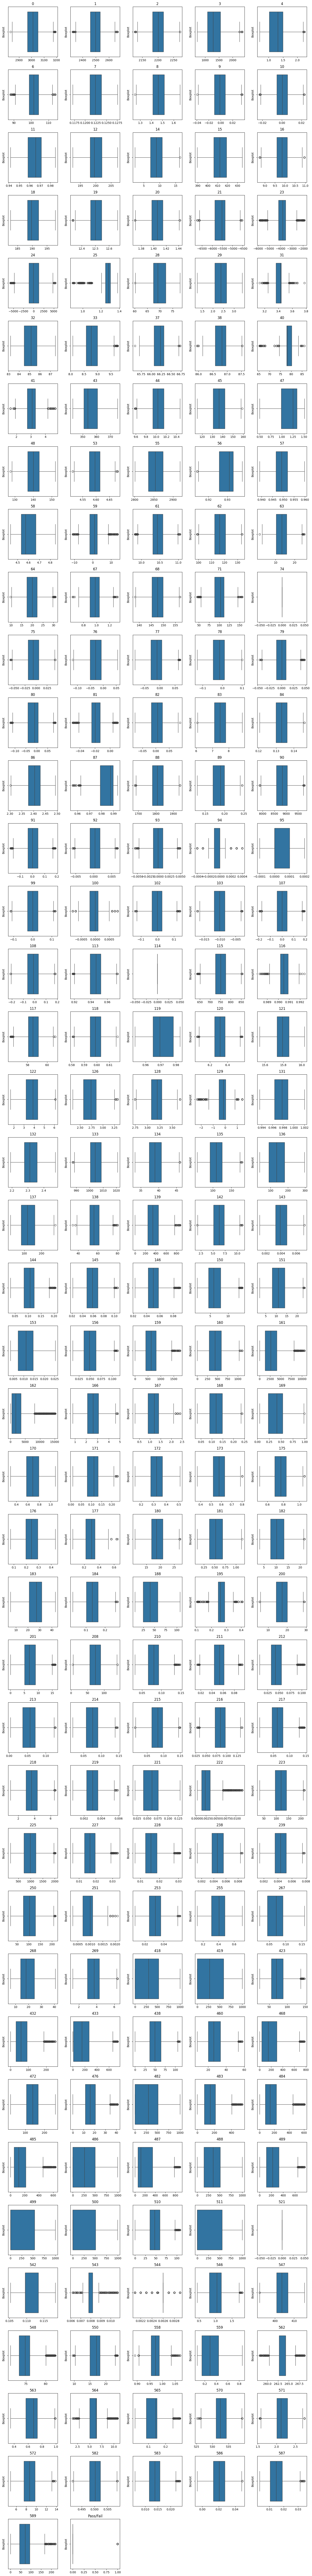

In [36]:
columns_per_row = 5
total_rows = (len(data.columns) + columns_per_row - 1) // columns_per_row
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, total_rows*3))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i], fill=True,orient="h")
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Boxplot')

for j in range(len(data.columns), total_rows * columns_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Now we have cleaned and removed all outliers form the dataset**

**Q3 B - Perform bivariate and multivariate analysis
with appropriate detailed comments after each
analysis.**

*Lets take subset of sample 10 columns and perform the analysis*

In [37]:
data.shape

(1567, 202)

In [38]:
subset_columns = data.sample(10, axis=1, random_state=42)

In [39]:
subset_columns.corr()

137        18        41       423       550       170        95  \
137  1.000000  0.019806  0.026938  0.061175  0.046226  0.009263  0.064987   
18   0.019806  1.000000  0.036318  0.005551 -0.024781  0.012427 -0.008170   
41   0.026938  0.036318  1.000000  0.009183  0.013748  0.045997  0.017352   
423  0.061175  0.005551  0.009183  1.000000  0.070703  0.070113  0.118962   
550  0.046226 -0.024781  0.013748  0.070703  1.000000  0.008262 -0.029039   
170  0.009263  0.012427  0.045997  0.070113  0.008262  1.000000  0.014416   
95   0.064987 -0.008170  0.017352  0.118962 -0.029039  0.014416  1.000000   
487  0.020894  0.028692 -0.058258 -0.062499 -0.040322 -0.100964  0.031382   
433 -0.016252 -0.068229 -0.007330  0.014841 -0.029160 -0.049580 -0.027062   
64   0.004912  0.006252  0.040778 -0.023748 -0.031059 -0.046293  0.043572   

          487       433        64  
137  0.020894 -0.016252  0.004912  
18   0.028692 -0.068229  0.006252  
41  -0.058258 -0.007330  0.040778  
423 -0.062499  0.014841 -0.023748  
550 -0.040322 -0.029160 -0.031059  
170 -0.100964 -0.049580 -0.046293  
95   0.031382 -0.027062  0.043572  
487  1.000000  0.032866  0.013466  
433  0.032866  1.000000  0.034024  
64   0.013466  0.034024  1.000000

In [40]:
subset_columns.head()

137        18     41      423        550     170      95       487  \
0   75.2  192.3963  4.515  53.6840  12.930000  0.7250  0.0000    0.0000   
1   81.0  191.2872  2.773  61.8918  16.000000  1.0498  0.0001  820.7900   
2   96.5  192.7035  3.080  50.6425  16.160000  1.0824  0.0002   74.0741   
3  123.7  192.1557  3.080  94.4594  17.013313  0.9386  0.0002   71.7583   
4  123.1  191.6037  2.209  85.2255  19.630000  0.5760 -0.0001  587.3773   

        433       64  
0   49.0013  21.7264  
1  199.7866  19.1927  
2  109.5747  16.1755  
3  181.2641  15.6209  
4    0.0000  20.0445

In [41]:
subset_columns["target"] = data["Pass/Fail"]

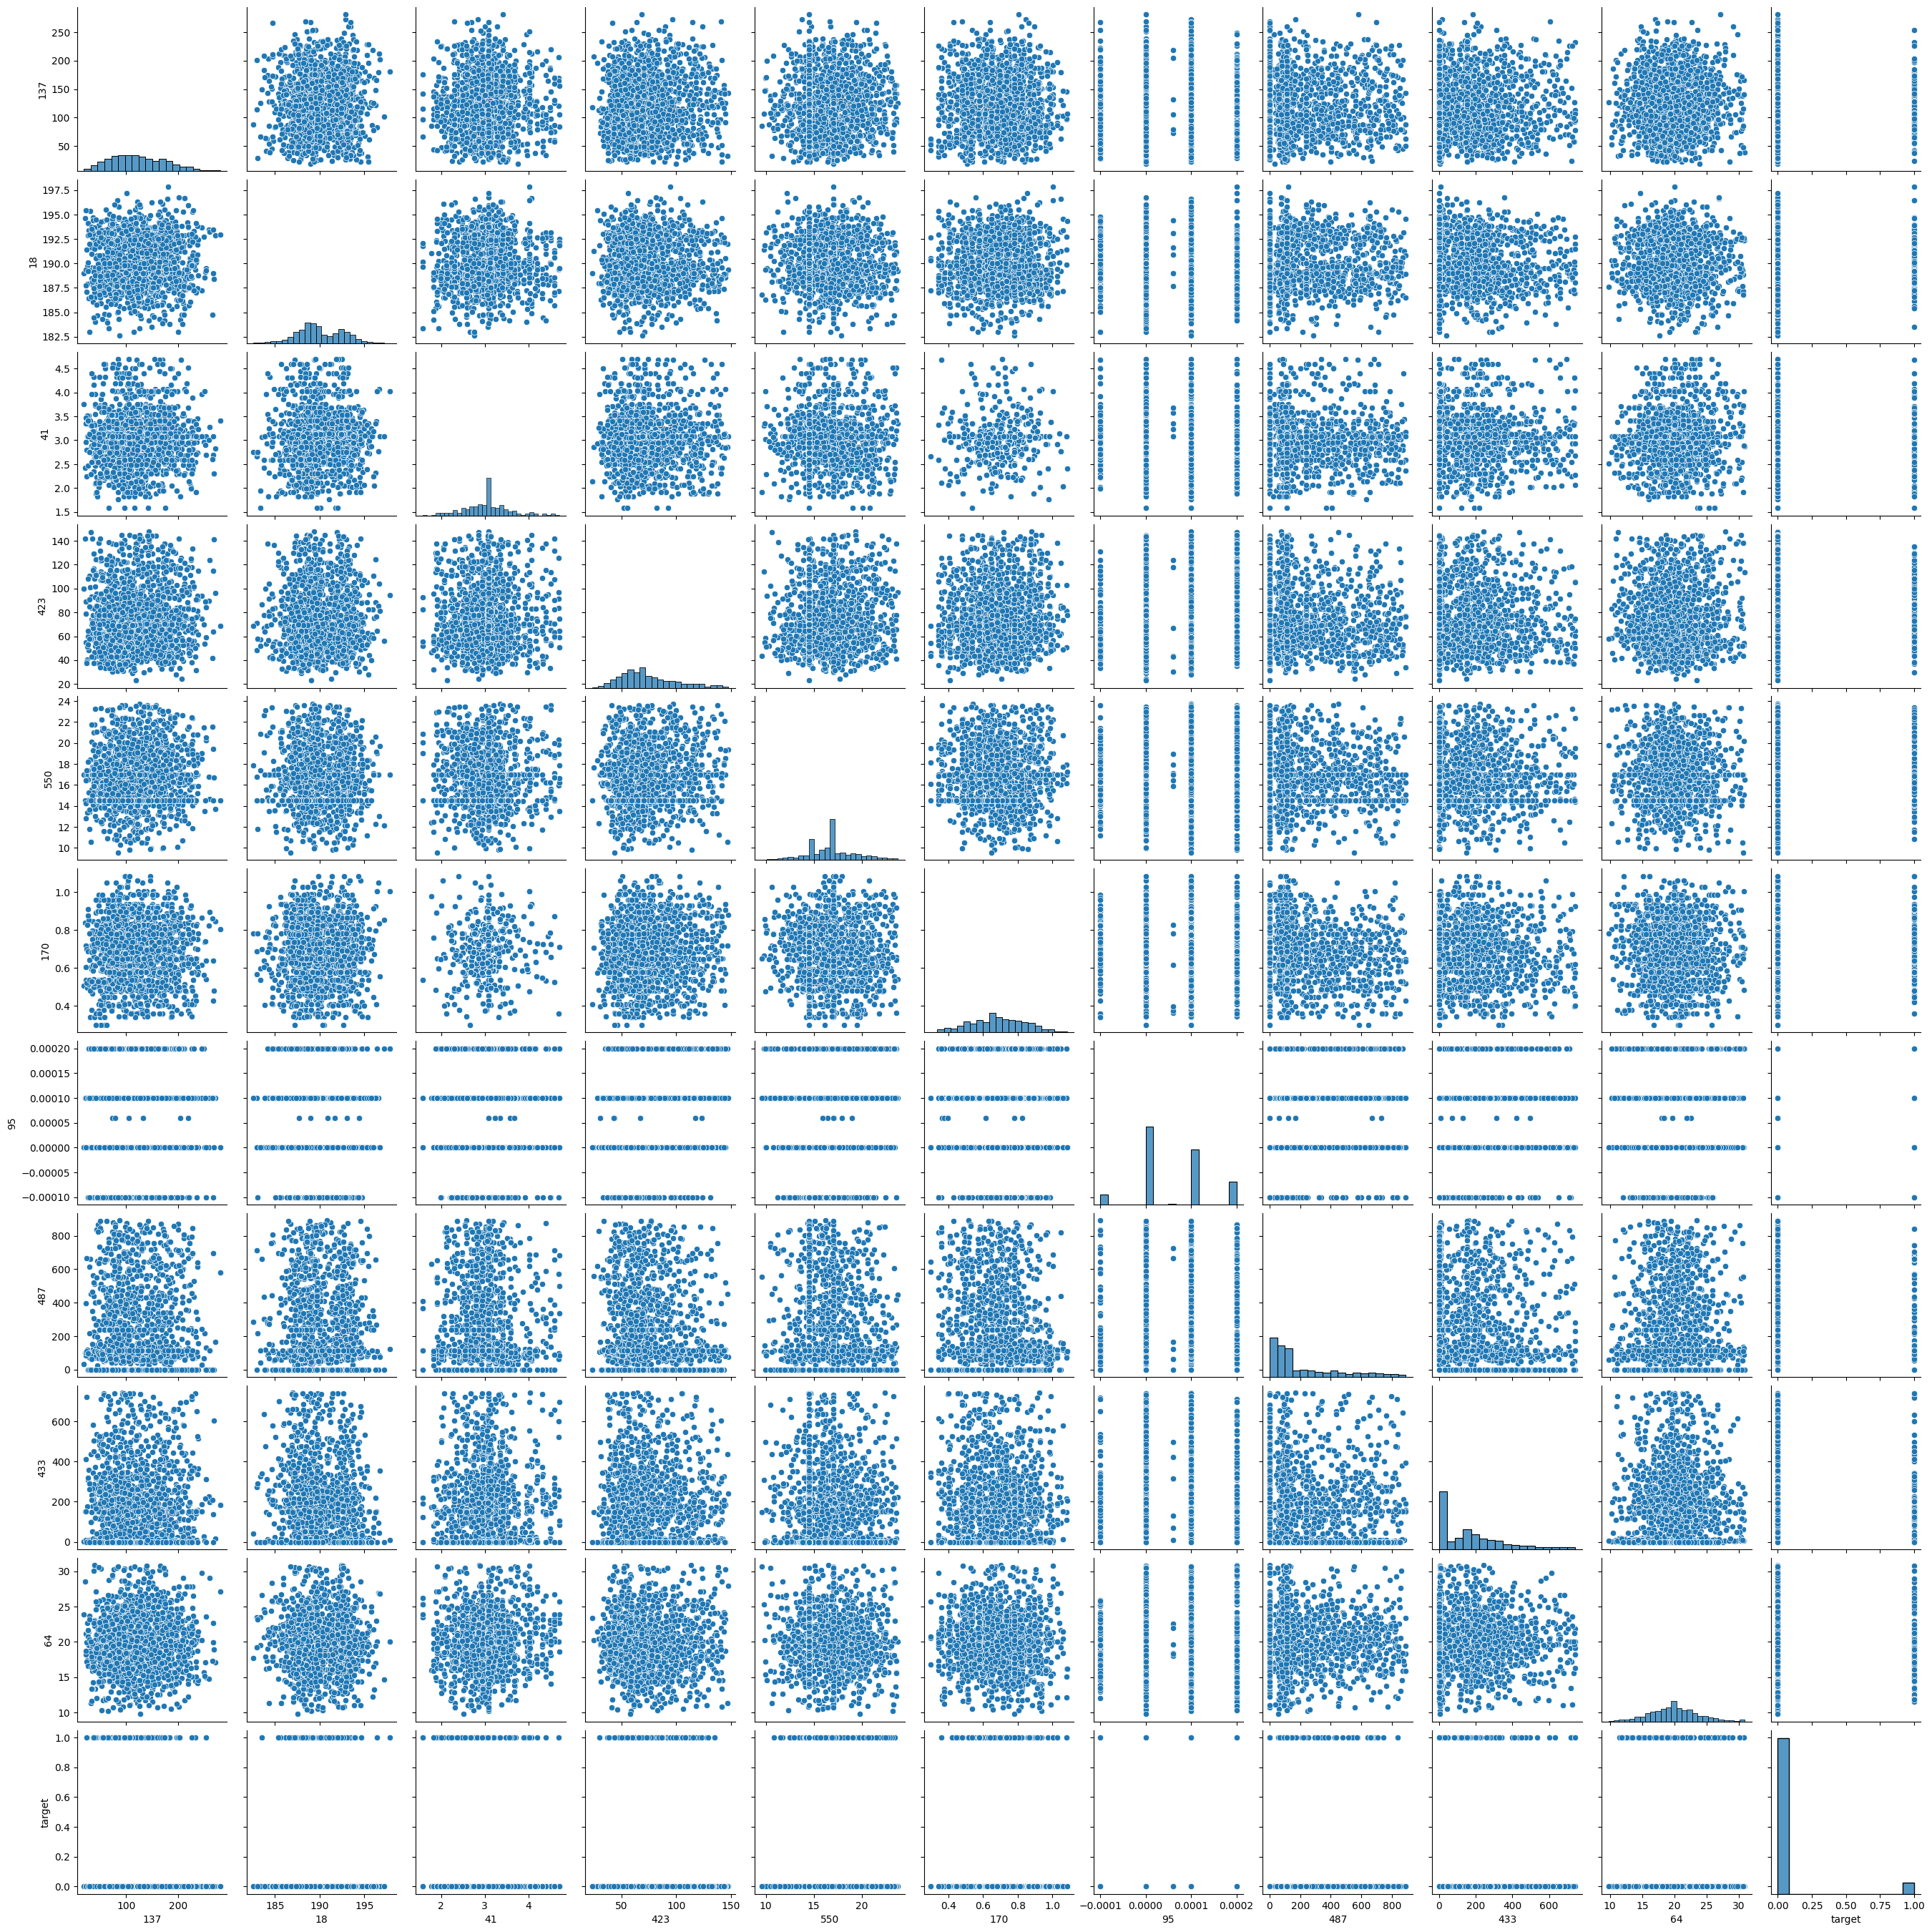

In [42]:
sns.pairplot(subset_columns)

**Insights from pairplot**

We dont' see any outliers(since we removed), correlation between independent variables (since we removed multi collinearity) and we see some different distribution of data normal, skewed and binomial

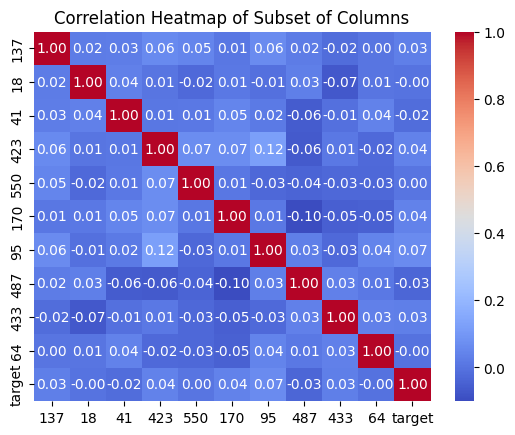

In [43]:
correlation_matrix = subset_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Subset of Columns')
plt.show()


**Insights from heatmap**

We dont' see any any high positive or negative correlation between independent variables since we have treated multicollinearity before

**Q4 A - Segregate predictors vs target attributes.**

In [44]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [45]:
X.head()

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...       564      565       570     571    572     582  \
0  0.0162 -0.0034  ...  6.444985  0.14561  533.8500  2.1113   8.95  0.5005   
1 -0.0005 -0.0148  ...  6.444985  0.14561  535.0164  2.4335   5.92  0.5019   
2  0.0041  0.0013  ...  6.290000  0.14280  535.0245  2.0293  11.21  0.4958   
3 -0.0124 -0.0033  ...  7.320000  0.16300  530.5682  2.0253   9.33  0.4990   
4 -0.0031 -0.0072  ...  6.444985  0.14561  532.0155  2.0275   8.83  0.5002   

      583       586       587         589  
0  0.0118  0.021458  0.016475   99.670066  
1  0.0223  0.009600  0.020100  208.204500  
2  0.0157  0.020500  0.014800   82.860200  
3  0.0103  0.020200  0.014900   73.843200  
4  0.0138  0.020200  0.014900   73.843200  

[5 rows x 201 columns]

In [46]:
Y.unique()

array([0, 1])

**Q4 B - Check for target balancing and fix it if
found imbalanced.**

In [47]:
data["Pass/Fail"].value_counts()/len(data["Pass/Fail"])

Pass/Fail
0    0.933631
1    0.066369
Name: count, dtype: float64

*There is a class imbalance class 0 has nearly 94% of data and class 1 has 6% of data*

In [48]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [49]:
y_resampled.value_counts()/len(y_resampled)

Pass/Fail
0    0.5
1    0.5
Name: count, dtype: float64

*Class imbalance has been fixed, each class has equal no of records (50% each)*

**Q4 C - Perform train-test split and standardize the
data or vice versa if required.**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(2340, 201)

In [52]:
X_test.shape

(586, 201)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Q4 D - Check if the train and test data have
similar statistical characteristics when compared
with original data.**

In [54]:
data_stats = data.describe()
train_stats = X_train.describe()
test_stats = X_test.describe()

In [55]:
print("5 points summary of Orginal Dataset")
data_stats.T

5 points summary of Orginal Dataset


count         mean         std        min        25%        50%  \
0          1567.0  3010.002449   61.721903  2831.9100  2968.1950  3011.8400   
1          1567.0  2496.985253   59.577861  2326.5900  2459.8700  2498.9100   
2          1567.0  2201.001188   25.681452  2126.6555  2183.0556  2200.9556   
3          1567.0  1345.707557  334.300811   711.0258  1084.3779  1287.3538   
4          1567.0     1.296507    0.333287     0.6815     1.0177     1.3171   
...           ...          ...         ...        ...        ...        ...   
583        1567.0     0.013891    0.003183     0.0060     0.0116     0.0138   
586        1567.0     0.020574    0.010188    -0.0060     0.0135     0.0205   
587        1567.0     0.015366    0.006558     0.0032     0.0106     0.0148   
589        1567.0    76.511991   45.382032     0.0000    44.3686    72.0230   
Pass/Fail  1567.0     0.066369    0.249005     0.0000     0.0000     0.0000   

                 75%        max  
0          3051.8400  3190.9700  
1          2534.3250  2666.0400  
2          2217.5778  2270.2556  
3          1551.6947  2347.9092  
4             1.4905     2.2449  
...              ...        ...  
583           0.0158     0.0237  
586           0.0274     0.0484  
587           0.0190     0.0345  
589          94.4159   220.0378  
Pass/Fail     0.0000     1.0000  

[202 rows x 8 columns]

In [56]:
print("5 points summary of Train Dataset")
train_stats.T

5 points summary of Train Dataset


count         mean         std        min          25%          50%  \
0    2340.0  3002.067137   58.663400  2831.9100  2960.991023  2999.928712   
1    2340.0  2495.576947   55.204692  2326.5900  2461.791120  2498.910000   
2    2340.0  2199.394110   23.290714  2126.6555  2181.502559  2199.403326   
3    2340.0  1341.409893  297.992497   711.0258  1108.377384  1287.353800   
4    2340.0     1.282415    0.295538     0.6815     1.051800     1.301383   
..      ...          ...         ...        ...          ...          ...   
582  2340.0     0.500311    0.003208     0.4915     0.498200     0.500327   
583  2340.0     0.013929    0.002905     0.0060     0.011800     0.013800   
586  2340.0     0.020563    0.009492    -0.0060     0.014200     0.020500   
587  2340.0     0.015880    0.006017     0.0032     0.011212     0.015103   
589  2340.0    78.605919   43.948670     0.0000    48.826932    72.023000   

             75%        max  
0    3041.347665  3190.9700  
1    2529.499776  2664.5200  
2    2214.933300  2270.2556  
3    1532.201751  2347.9092  
4       1.460046     2.2449  
..           ...        ...  
582     0.502462     0.5090  
583     0.015800     0.0237  
586     0.026903     0.0484  
587     0.019896     0.0345  
589    96.819668   220.0378  

[201 rows x 8 columns]

In [57]:
print("5 points summary of Test Dataset")
test_stats.T

5 points summary of Test Dataset


count         mean         std        min          25%          50%  \
0    586.0  3000.776827   56.192095  2846.0700  2964.410060  2998.730937   
1    586.0  2494.165811   55.611917  2332.3900  2460.193163  2498.910000   
2    586.0  2198.869640   22.273068  2134.7445  2183.457111  2197.691265   
3    586.0  1346.186935  283.880560   867.3027  1111.920748  1297.386426   
4    586.0     1.307928    0.297035     0.7367     1.098000     1.317100   
..     ...          ...         ...        ...          ...          ...   
582  586.0     0.500335    0.003097     0.4915     0.498319     0.500425   
583  586.0     0.013815    0.002786     0.0071     0.011706     0.013800   
586  586.0     0.020443    0.009783    -0.0060     0.013928     0.020500   
587  586.0     0.016279    0.006114     0.0045     0.011662     0.015700   
589  586.0    79.310730   44.962400     0.0000    47.328157    72.023000   

             75%        max  
0    3033.313962  3190.7800  
1    2527.492683  2666.0400  
2    2214.287830  2256.6000  
3    1529.241096  2341.7833  
4       1.484296     2.2328  
..           ...        ...  
582     0.502302     0.5088  
583     0.015675     0.0236  
586     0.026893     0.0484  
587     0.020068     0.0339  
589    98.371259   220.0378  

[201 rows x 8 columns]

In [58]:
# T.iloc[1,:]
summary_comparison = pd.concat([data_stats.T.iloc[1,:], train_stats.T.iloc[1,:], test_stats.T.iloc[1,:]], axis=1)


In [59]:
print("Comparision of 5 points summary of column 1 (sample coln) to check the statistical characteristics")
summary_comparison

Comparision of 5 points summary of column 1 (sample coln) to check the statistical characteristics


1            1            1
count  1567.000000  2340.000000   586.000000
mean   2496.985253  2495.576947  2494.165811
std      59.577861    55.204692    55.611917
min    2326.590000  2326.590000  2332.390000
25%    2459.870000  2461.791120  2460.193163
50%    2498.910000  2498.910000  2498.910000
75%    2534.325000  2529.499776  2527.492683
max    2666.040000  2664.520000  2666.040000

**Orginal dataset, train dataset and test dataset has similar statistical characteristics**

**Q5 A - Use any Supervised Learning technique to
train a model.**

In [60]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [61]:
print("Train Score",dTree.score(X_train, y_train))
print("Test Score",dTree.score(X_test, y_test))

Train Score 1.0
Test Score 0.8822525597269625


The simple model has 1 as train score and 0.88 as test score

This seems to be overfitted since it perform very good with training set and low with test set

Confusion Matrix- Simple Dtree


<Axes: >

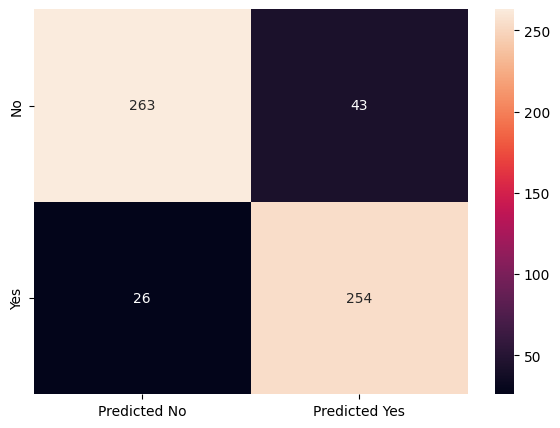

In [62]:
print("Confusion Matrix- Simple Dtree")
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [63]:
predicted_labels_test = dTree.predict(X_test)
print("Test Performance Matrix: (Simple Dtree Model):")
metrics.classification_report(y_test, predicted_labels_test).split("\n")

Test Performance Matrix: (Simple Dtree Model):


['              precision    recall  f1-score   support',
 '',
 '           0       0.91      0.86      0.88       306',
 '           1       0.86      0.91      0.88       280',
 '',
 '    accuracy                           0.88       586',
 '   macro avg       0.88      0.88      0.88       586',
 'weighted avg       0.88      0.88      0.88       586',
 '']

Simple Model Observation

Class False:

Precision is 0.91

Recall is 0.88

F1-Score is 0.89

Class True:

Precision is 0.87

Recall is 0.90

F1-Score is 0.89

**Q5 B - Use cross validation techniques.**

In [67]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(DecisionTreeClassifier(), X_resampled, y_resampled, cv=kf)

In [68]:
print(cv_scores)
print("Accuracy : %.1f%% (%.1f%%)"%(cv_scores.mean()*100,cv_scores.std()*100))

[0.89761092 0.88737201 0.90443686 0.87030717 0.91467577 0.95221843
 0.87328767 0.85616438 0.86986301 0.8869863 ]
Accuracy : 89.1% (2.6%)


*Have tried 10 fold validation , received accuracy is 89% (with 2.6% as standard decviartion from mean)*